In [3]:
# !pip install yfinance

In [4]:
# !pip install yahoofinancials

In [ ]:
# pip install holoviews

In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from pylab import rcParams
from datetime import datetime
from datetime import date
from datetime import timedelta
import time
from pathlib import Path

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [36]:
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas_datareader as dr

In [37]:
symbols_list = []
for dirname, _, filenames in os.walk(Path("Resources")):
    for filename in filenames:
        symbols_list.append(filename[:-4])

names_list = [x for x in symbols_list]
n0 = len(symbols_list)

print(symbols_list)
print(n0)
print(names_list)


['ARGGY', 'BMWYY', 'BYDDF', 'CENN', 'DNFGF', 'EVTV', 'F', 'FFIE', 'FSR', 'FUJHY', 'FUV', 'GELYF', 'GM', 'GOEV', 'GWLLY', 'HMC', 'HYMTF', 'HYZN', 'ISUZY', 'KNDI', 'LCID', 'LI', 'MAHMF', 'MBGYY', 'MULN', 'MZDAY', 'NIO', 'NKLA', 'NSANY', 'PII', 'PSNY', 'RACE', 'RIVN', 'RNLSY', 'SOLO', 'STLA', 'TM', 'TSLA', 'VLVLY', 'VWAGY', 'XPEV']
41
['ARGGY', 'BMWYY', 'BYDDF', 'CENN', 'DNFGF', 'EVTV', 'F', 'FFIE', 'FSR', 'FUJHY', 'FUV', 'GELYF', 'GM', 'GOEV', 'GWLLY', 'HMC', 'HYMTF', 'HYZN', 'ISUZY', 'KNDI', 'LCID', 'LI', 'MAHMF', 'MBGYY', 'MULN', 'MZDAY', 'NIO', 'NKLA', 'NSANY', 'PII', 'PSNY', 'RACE', 'RIVN', 'RNLSY', 'SOLO', 'STLA', 'TM', 'TSLA', 'VLVLY', 'VWAGY', 'XPEV']


In [38]:
import datetime

# Get today's date
d_today = datetime.date.today()

# Calculate the date 58 weeks ago
d_start = d_today - datetime.timedelta(days=7*58)

# Print both dates
print(d_start, d_today)


2023-01-20 2024-03-01


In [39]:
for i in range(n0):
    data = yf.download(symbols_list[i], start=d_start, end=d_today, interval ="1d")
    time.sleep(1)
    if len(data)!=0:
        print(i)
        data.drop('Volume', axis = 1, inplace = True)
        xcols = data.columns.copy()
        data.columns = [symbols_list[i] + '_' + f for f in xcols]
        data.to_csv(symbols_list[i] + '_series.csv', index = True)
    else:
        print('drop',i,symbols_list[i])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0



[*********************100%%**********************]  1 of 1 completed

1



[*********************100%%**********************]  1 of 1 completed

2



[*********************100%%**********************]  1 of 1 completed

3



[*********************100%%**********************]  1 of 1 completed

4



[*********************100%%**********************]  1 of 1 completed

5



[*********************100%%**********************]  1 of 1 completed

6



[*********************100%%**********************]  1 of 1 completed

7



[*********************100%%**********************]  1 of 1 completed

8



[*********************100%%**********************]  1 of 1 completed

9



[*********************100%%**********************]  1 of 1 completed

10



[*********************100%%**********************]  1 of 1 completed

11



[*********************100%%**********************]  1 of 1 completed

12



[*********************100%%**********************]  1 of 1 completed

13



[*********************100%%**********************]  1 of 1 completed

14



[*********************100%%**********************]  1 of 1 completed

15



[*********************100%%**********************]  1 of 1 completed

16



[*********************100%%**********************]  1 of 1 completed

17



[*********************100%%**********************]  1 of 1 completed

18



[*********************100%%**********************]  1 of 1 completed

19



[*********************100%%**********************]  1 of 1 completed

20



[*********************100%%**********************]  1 of 1 completed

21



[*********************100%%**********************]  1 of 1 completed

22



[*********************100%%**********************]  1 of 1 completed

23



[*********************100%%**********************]  1 of 1 completed

24



[*********************100%%**********************]  1 of 1 completed

25



[*********************100%%**********************]  1 of 1 completed

26



[*********************100%%**********************]  1 of 1 completed

27



[*********************100%%**********************]  1 of 1 completed

28



[*********************100%%**********************]  1 of 1 completed

29



[*********************100%%**********************]  1 of 1 completed

30



[*********************100%%**********************]  1 of 1 completed

31



[*********************100%%**********************]  1 of 1 completed

32



[*********************100%%**********************]  1 of 1 completed

33



[*********************100%%**********************]  1 of 1 completed

34



[*********************100%%**********************]  1 of 1 completed

35



[*********************100%%**********************]  1 of 1 completed

36



[*********************100%%**********************]  1 of 1 completed

37



[*********************100%%**********************]  1 of 1 completed

38



[*********************100%%**********************]  1 of 1 completed

39


40


In [40]:
file_list = [f for f in os.listdir('.') if '.csv' in f]

In [42]:

paths0 = []
# Walk through the directory and its subdirectories

for dirname, _, filenames in os.walk(Path("Resources")):
    for filename in filenames:
        if filename[-4:] == '.csv' and 'combined' not in filename:
            paths0.append(os.path.join(dirname, filename))
            
# Sort the list of paths
paths = sorted(paths0)
# Get the number of paths
n = len(paths)


41

In [43]:
# Get just the filename from the path
# Extract the symbol from the filename

for i, item in enumerate(paths):
 # Extract the filename from the path
    filename = os.path.split(item)[-1]
 # Extract the symbol from the filename
    symbol = filename.split('.')[0].split('_')[0]
 # Print the index, filename, and symbol
    print(f"{i}: {filename} -> {symbol}")



0: ARGGY.csv -> ARGGY
1: BMWYY.csv -> BMWYY
2: BYDDF.csv -> BYDDF
3: CENN.csv -> CENN
4: DNFGF.csv -> DNFGF
5: EVTV.csv -> EVTV
6: F.csv -> F
7: FFIE.csv -> FFIE
8: FSR.csv -> FSR
9: FUJHY.csv -> FUJHY
10: FUV.csv -> FUV
11: GELYF.csv -> GELYF
12: GM.csv -> GM
13: GOEV.csv -> GOEV
14: GWLLY.csv -> GWLLY
15: HMC.csv -> HMC
16: HYMTF.csv -> HYMTF
17: HYZN.csv -> HYZN
18: ISUZY.csv -> ISUZY
19: KNDI.csv -> KNDI
20: LCID.csv -> LCID
21: LI.csv -> LI
22: MAHMF.csv -> MAHMF
23: MBGYY.csv -> MBGYY
24: MULN.csv -> MULN
25: MZDAY.csv -> MZDAY
26: NIO.csv -> NIO
27: NKLA.csv -> NKLA
28: NSANY.csv -> NSANY
29: PII.csv -> PII
30: PSNY.csv -> PSNY
31: RACE.csv -> RACE
32: RIVN.csv -> RIVN
33: RNLSY.csv -> RNLSY
34: SOLO.csv -> SOLO
35: STLA.csv -> STLA
36: TM.csv -> TM
37: TSLA.csv -> TSLA
38: VLVLY.csv -> VLVLY
39: VWAGY.csv -> VWAGY
40: XPEV.csv -> XPEV


In [44]:
n

41

In [45]:
data.columns

Index(['XPEV_Open', 'XPEV_High', 'XPEV_Low', 'XPEV_Close', 'XPEV_Adj Close'], dtype='object')

In [46]:
gains = [0] * n
mgains = [0] * n
wgains = [0] * n

for i in range(n):
    data0 = pd.read_csv(paths[i])
    data0.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']
    data = data0[['Date', 'Close']]
    data['MA'] = data['Close'].rolling(25).mean()
    
    # Calculate the latest annual gain
    gain = round(((data.iloc[-1, 1] - data.iloc[24, 1]) * 100 / data.iloc[24, 1]), 2)
    mgain = round(((data.iloc[-1, 1] - data.iloc[-26, 1]) * 100 / data.iloc[-26, 1]), 2)
    wgain = round(((data.iloc[-1, 1] - data.iloc[-6, 1]) * 100 / data.iloc[-6, 1]), 2)
    
    gains[i] = gain
    mgains[i] = mgain
    wgains[i] = wgain


C:\Users\navje\AppData\Local\Temp\ipykernel_28428\699915201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'] = data['Close'].rolling(25).mean()
C:\Users\navje\AppData\Local\Temp\ipykernel_28428\699915201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA'] = data['Close'].rolling(25).mean()
C:\Users\navje\AppData\Local\Temp\ipykernel_28428\699915201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [47]:
print(len(symbols_list),len(names_list),n)

41 41 41


In [65]:
# Calculate the number of trading days in a year (approximately 252 days)
trading_days_in_year = 252

# Create empty lists to store annual growth rates
annual_growths = []

# Iterate over each symbol's data
for i in range(n):
    data = pd.read_csv(paths[i])
    data = data.sort_values('Date')
    
    # Check if there is enough data to calculate annual growth rate
    if len(data) >= trading_days_in_year:
        # Calculate the closing price from one year ago
        one_year_ago = data.iloc[-trading_days_in_year]['Close']
        # Get the latest closing price
        latest_close = data.iloc[-1]['Close']
        # Calculate the annual growth rate
        annual_growth = ((latest_close - one_year_ago) / one_year_ago) * 100
    else:
        # If there isn't enough data, set the annual growth rate to None
        annual_growth = None
    
    # Append the annual growth rate to the list
    annual_growths.append(annual_growth)

# Create a DataFrame with the annual growth rates
RANKING = pd.DataFrame({'Name': names_list[:n], 'Annual Growth Rate': annual_growths})

# Sort DataFrame based on annual growth rate
RANKING = RANKING.sort_values('Annual Growth Rate', ascending=False)

# Print top and bottom 40 of each ranking
print("Annual Growth Rate 1-40")
print(RANKING['Name'].tolist()[:40])
print("Annual Growth Rate -40-")
print(RANKING['Name'].tolist()[-40:])

# Display sorted DataFrame
RANKING


Annual Growth Rate 1-40
['TSLA', 'HYMTF', 'MAHMF', 'LI', 'FUJHY', 'MZDAY', 'VLVLY', 'ISUZY', 'RACE', 'BMWYY', 'XPEV', 'NSANY', 'TM', 'MBGYY', 'ARGGY', 'RNLSY', 'VWAGY', 'BYDDF', 'PII', 'RIVN', 'HMC', 'GWLLY', 'GELYF', 'DNFGF', 'EVTV', 'NIO', 'GM', 'F', 'HYZN', 'KNDI', 'LCID', 'FUV', 'PSNY', 'SOLO', 'NKLA', 'GOEV', 'FSR', 'CENN', 'FFIE', 'MULN']
Annual Growth Rate -40-
['HYMTF', 'MAHMF', 'LI', 'FUJHY', 'MZDAY', 'VLVLY', 'ISUZY', 'RACE', 'BMWYY', 'XPEV', 'NSANY', 'TM', 'MBGYY', 'ARGGY', 'RNLSY', 'VWAGY', 'BYDDF', 'PII', 'RIVN', 'HMC', 'GWLLY', 'GELYF', 'DNFGF', 'EVTV', 'NIO', 'GM', 'F', 'HYZN', 'KNDI', 'LCID', 'FUV', 'PSNY', 'SOLO', 'NKLA', 'GOEV', 'FSR', 'CENN', 'FFIE', 'MULN', 'STLA']


,Name,Annual Growth Rate
37,TSLA,65.025188
16,HYMTF,51.660719
22,MAHMF,37.446417
21,LI,36.296298
9,FUJHY,34.101942
25,MZDAY,32.558140
38,VLVLY,31.818177
18,ISUZY,12.295082
31,RACE,9.010137
1,BMWYY,3.286523


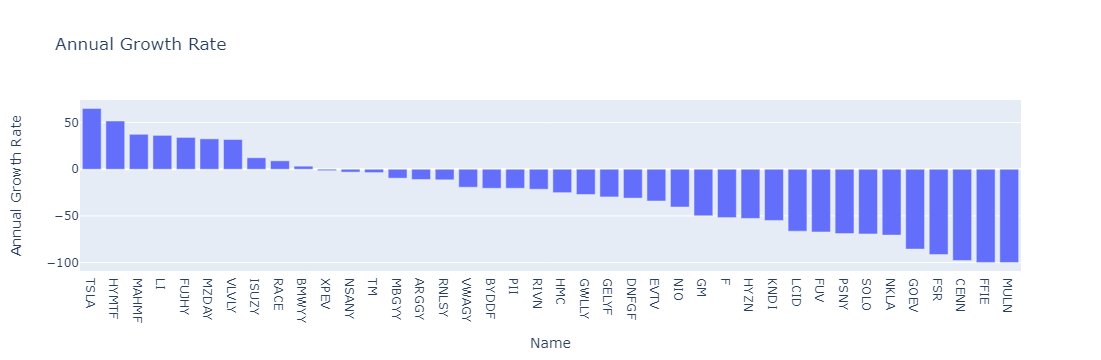

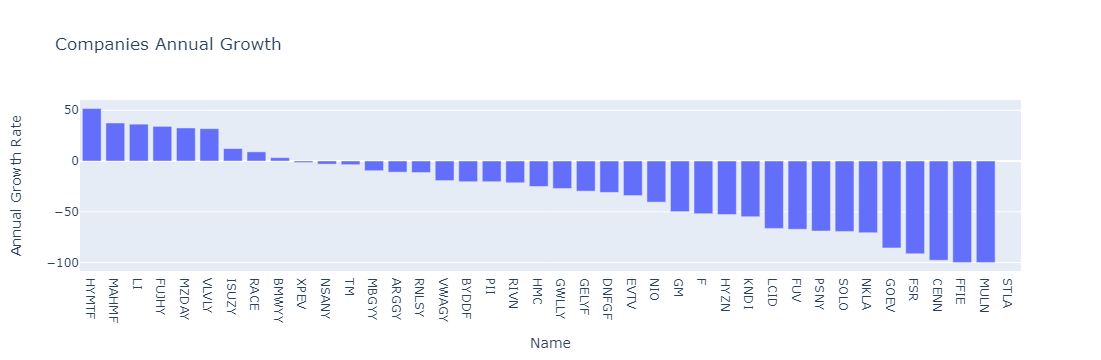

In [59]:
fig = px.bar(RANKING2[0:40], x='Name', y='Annual Growth Rate',title="Annual Growth Rate")
fig.show()
fig = px.bar(RANKING2[-40:], x='Name', y='Annual Growth Rate',title="Companies Annual Growth")
fig.show()

In [66]:
# Calculate the number of trading days in a month (approximately 21 days) and a week (approximately 5 days)
trading_days_in_month = 21
trading_days_in_week = 5

# Create empty lists to store monthly and weekly growth rates
monthly_growths = []
weekly_growths = []

# Iterate over each symbol's data
for i in range(n):
    data = pd.read_csv(paths[i])
    data = data.sort_values('Date')
    
    # Check if there is enough data to calculate monthly and weekly growth rates
    if len(data) >= trading_days_in_month:
        # Calculate the closing price from one month ago
        one_month_ago = data.iloc[-trading_days_in_month]['Close']
        # Calculate the monthly growth rate
        monthly_growth = ((latest_close - one_month_ago) / one_month_ago) * 100
    else:
        # If there isn't enough data, set the monthly growth rate to None
        monthly_growth = None
    
    if len(data) >= trading_days_in_week:
        # Calculate the closing price from one week ago
        one_week_ago = data.iloc[-trading_days_in_week]['Close']
        # Calculate the weekly growth rate
        weekly_growth = ((latest_close - one_week_ago) / one_week_ago) * 100
    else:
        # If there isn't enough data, set the weekly growth rate to None
        weekly_growth = None
    
    # Append the monthly and weekly growth rates to the lists
    monthly_growths.append(monthly_growth)
    weekly_growths.append(weekly_growth)

# Create a DataFrame with the monthly and weekly growth rates
RANKING['Monthly Growth Rate'] = monthly_growths
RANKING['Weekly Growth Rate'] = weekly_growths

# Sort DataFrame based on annual growth rate
RANKING = RANKING.sort_values('Annual Growth Rate', ascending=False)

# Print top and bottom 40 of each ranking
print("Annual Growth Rate 1-40")
print(RANKING['Name'].tolist()[:40])
print("Annual Growth Rate -40-")
print(RANKING2['Name'].tolist()[-40:])

# Display sorted DataFrame
RANKING


Annual Growth Rate 1-40
['TSLA', 'HYMTF', 'MAHMF', 'LI', 'FUJHY', 'MZDAY', 'VLVLY', 'ISUZY', 'RACE', 'BMWYY', 'XPEV', 'NSANY', 'TM', 'MBGYY', 'ARGGY', 'RNLSY', 'VWAGY', 'BYDDF', 'PII', 'RIVN', 'HMC', 'GWLLY', 'GELYF', 'DNFGF', 'EVTV', 'NIO', 'GM', 'F', 'HYZN', 'KNDI', 'LCID', 'FUV', 'PSNY', 'SOLO', 'NKLA', 'GOEV', 'FSR', 'CENN', 'FFIE', 'MULN']
Annual Growth Rate -40-
['HYMTF', 'MAHMF', 'LI', 'FUJHY', 'MZDAY', 'VLVLY', 'ISUZY', 'RACE', 'BMWYY', 'XPEV', 'NSANY', 'TM', 'MBGYY', 'ARGGY', 'RNLSY', 'VWAGY', 'BYDDF', 'PII', 'RIVN', 'HMC', 'GWLLY', 'GELYF', 'DNFGF', 'EVTV', 'NIO', 'GM', 'F', 'HYZN', 'KNDI', 'LCID', 'FUV', 'PSNY', 'SOLO', 'NKLA', 'GOEV', 'FSR', 'CENN', 'FFIE', 'MULN', 'STLA']


,Name,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
37,TSLA,65.025188,286.382979,319.399538
16,HYMTF,51.660719,-73.215341,-74.763758
22,MAHMF,37.446417,-63.534137,-61.361702
21,LI,36.296298,669.491525,603.875969
9,FUJHY,34.101942,2170.000000,2114.634146
25,MZDAY,32.558140,672.765957,273.662551
38,VLVLY,31.818177,28.248589,72.952381
18,ISUZY,12.295082,6076.870748,12511.111111
31,RACE,9.010137,920.224719,1110.666667
1,BMWYY,3.286523,-9.290709,-17.902351


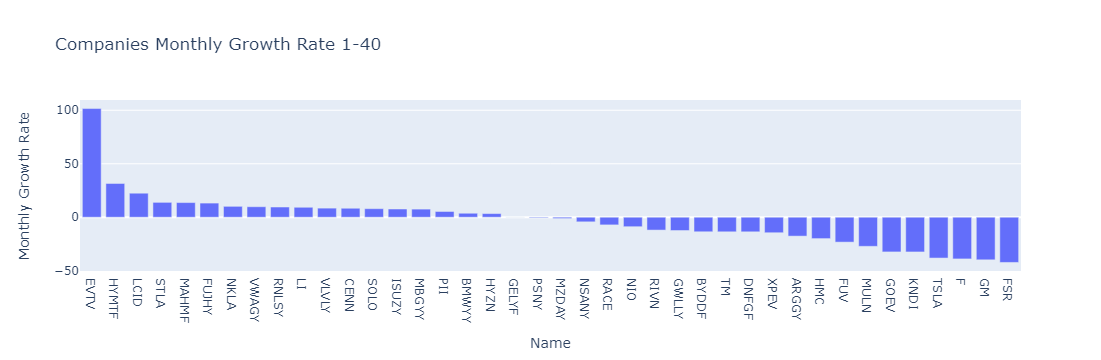

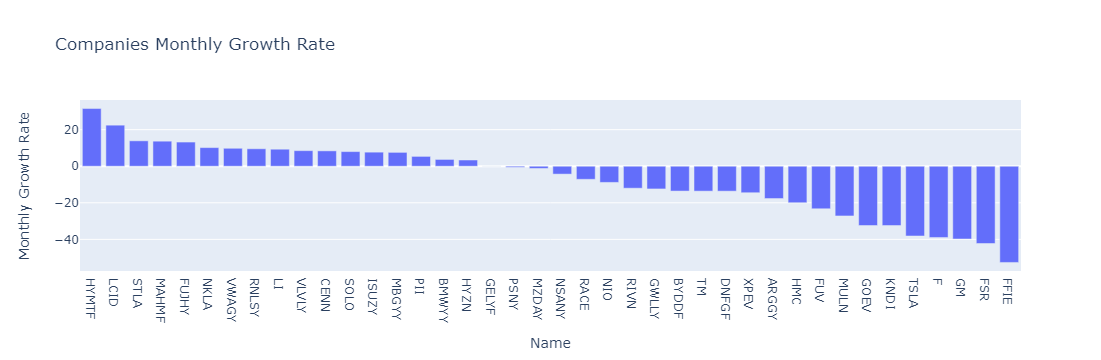

In [62]:
fig = px.bar(RANKING3[0:40], x='Name', y='Monthly Growth Rate',title="Companies Monthly Growth Rate 1-40")
fig.show()
fig = px.bar(RANKING3[-40:], x='Name', y='Monthly Growth Rate',title="Companies Monthly Growth Rate")
fig.show()

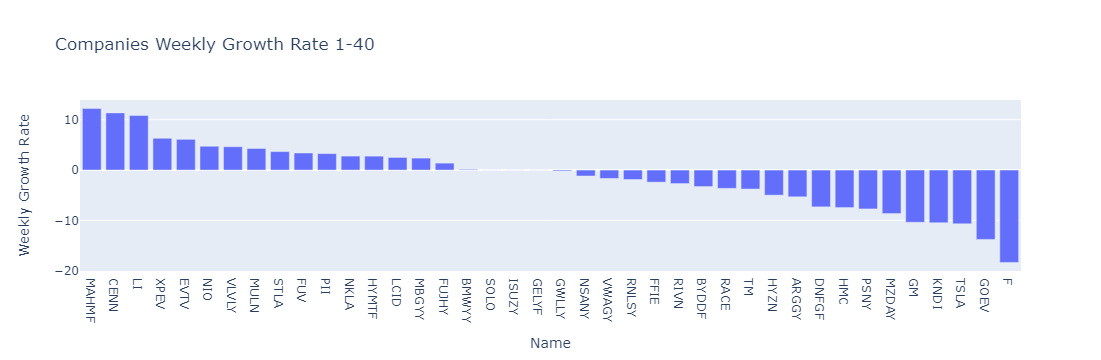

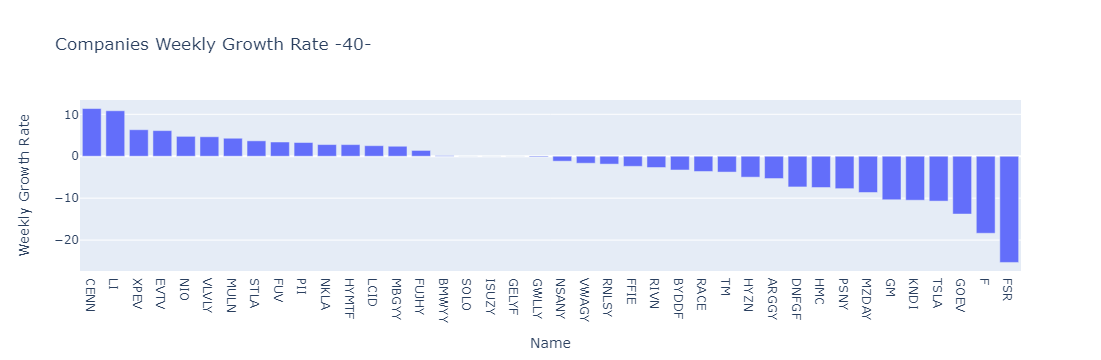

In [63]:
fig = px.bar(RANKING4[:40], x='Name', y='Weekly Growth Rate',title="Companies Weekly Growth Rate 1-40")
fig.show()
fig = px.bar(RANKING4[-40:], x='Name', y='Weekly Growth Rate',title="Companies Weekly Growth Rate -40-")
fig.show()

In [190]:
# # Save the DataFrame as a CSV file
# output_filename = "output/growth_rate.csv"
# RANKING.to_csv(output_filename, index=False)


In [191]:
data = pd.read_csv(r"Output\growth_rate.csv",
                  index_col="Name")
data.head()

,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
Name,,,
TSLA,65.025188,286.382979,319.399538
HYMTF,51.660719,-73.215341,-74.763758
MAHMF,37.446417,-63.534137,-61.361702
LI,36.296298,669.491525,603.875969
FUJHY,34.101942,2170.000000,2114.634146


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, TSLA to STLA
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Annual Growth Rate   40 non-null     float64
 1   Monthly Growth Rate  41 non-null     float64
 2   Weekly Growth Rate   41 non-null     float64
dtypes: float64(3)
memory usage: 1.3+ KB


In [194]:
# Drop rows with NaN values
data = data.dropna()

# Display the modified DataFrame
data.head()


,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
Name,,,
TSLA,65.025188,286.382979,319.399538
HYMTF,51.660719,-73.215341,-74.763758
MAHMF,37.446417,-63.534137,-61.361702
LI,36.296298,669.491525,603.875969
FUJHY,34.101942,2170.000000,2114.634146


In [195]:
data.dtypes

Annual Growth Rate     float64
Monthly Growth Rate    float64
Weekly Growth Rate     float64
dtype: object

In [196]:
# Convert float columns to integer
data.loc[:, 'Annual Growth Rate'] = data['Annual Growth Rate'].astype(int)
data.loc[:, 'Monthly Growth Rate'] = data['Monthly Growth Rate'].astype(int)
data.loc[:, 'Weekly Growth Rate'] = data['Weekly Growth Rate'].astype(int)

# Display the modified DataFrame
data.head()


,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
Name,,,
TSLA,65.0,286.0,319.0
HYMTF,51.0,-73.0,-74.0
MAHMF,37.0,-63.0,-61.0
LI,36.0,669.0,603.0
FUJHY,34.0,2170.0,2114.0


In [ ]:
#Prepare the Data

In [201]:
data.columns

Index(['Annual Growth Rate', 'Monthly Growth Rate', 'Weekly Growth Rate'], dtype='object')

In [202]:
data.dtypes

Annual Growth Rate     float64
Monthly Growth Rate    float64
Weekly Growth Rate     float64
dtype: object

In [203]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
stock_scale = StandardScaler().fit_transform(data[[ 'Annual Growth Rate', 'Monthly Growth Rate',
       'Weekly Growth Rate']])
                                              
stock_scale[0:5] 

array([[ 2.10542786, -0.22419571, -0.2071917 ],
       [ 1.7787336 , -0.49015608, -0.38445596],
       [ 1.45203933, -0.48274772, -0.37859226],
       [ 1.42870403,  0.05954475, -0.07909234],
       [ 1.38203342,  1.17154064,  0.60245041]])

In [205]:
stock_scale_df =  pd.DataFrame(stock_scale, columns=['Annual Growth Rate', 'Monthly Growth Rate',
       'Weekly Growth Rate'])

# Copy the crypto names from the original data
stock_scale_df["Name"] = data.index
                                                     
# Set the coinid column as index
stock_scale_df = stock_scale_df.set_index("Name")

# Display sample data
stock_scale_df.head(5)
stock_scale_df.tail(5)

,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
Name,,,
GOEV,-1.394868,-0.478303,-0.379043
FSR,-1.534880,-0.504973,-0.392575
CENN,-1.674891,-0.508677,-0.395281
FFIE,-1.721562,-0.481266,-0.379494
MULN,-1.721562,-0.456818,-0.367316


In [ ]:
Find the Best Value for k Using the Original Data.

In [206]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [207]:
from sklearn.cluster import KMeans
# Create a list with the number of k-values from 1 to 11
k= list(range(1,11))

In [208]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
#create inertia
inertia = []

In [209]:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(stock_scale_df)
    
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\nav

In [242]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(40)

,k,inertia
0,1,120.000000
1,2,58.167867
2,3,32.131941
3,4,22.804476
4,5,14.297848
5,6,10.038542
6,7,7.332106
7,8,5.144560
8,9,3.818491
9,10,2.827512


In [211]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k,
    color = "red"
)

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



:Curve   [k]   (inertia)

In [143]:
#Cluster stock with K-means Using the Original Data

In [212]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [213]:
# Fit the K-Means model using the scaled data
model.fit(stock_scale_df)

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [214]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(stock_scale_df)


# Print the resulting array of cluster values.
print(k_4)

[1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0]


In [215]:
# Create a copy of the DataFrame
stock_predictions_df = stock_scale_df.copy()

# Review the DataFrame
stock_predictions_df.head()

,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate
Name,,,
TSLA,2.105428,-0.224196,-0.207192
HYMTF,1.778734,-0.490156,-0.384456
MAHMF,1.452039,-0.482748,-0.378592
LI,1.428704,0.059545,-0.079092
FUJHY,1.382033,1.171541,0.602450


In [243]:
# Add a new column to the DataFrame with the predicted clusters
stock_predictions_df["predicted_cluster"] = k_4

# Display sample data with added "predicted_cluster" column
stock_predictions_df.head()

,Annual Growth Rate,Monthly Growth Rate,Weekly Growth Rate,predicted_cluster
Name,,,,
TSLA,2.105428,-0.224196,-0.207192,1
HYMTF,1.778734,-0.490156,-0.384456,1
MAHMF,1.452039,-0.482748,-0.378592,1
LI,1.428704,0.059545,-0.079092,1
FUJHY,1.382033,1.171541,0.602450,1


In [160]:
import hvplot.pandas

# Assuming your DataFrame is named stock_predictions_df
stock_predictions_df.hvplot.scatter(
    x='Annual Growth Rate',
    y='Monthly Growth Rate',
    by='predicted_cluster',
    hover_cols='Name',
    xlabel='Annual Growth Rate',
    ylabel='Monthly Growth Rate',
    title='Scatter Plot of Annual Growth Rate vs. Monthly Growth Rate'
)


C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



:NdOverlay   [predicted_cluster]
   :Scatter   [Annual Growth Rate]   (Monthly Growth Rate,Name)

In [161]:
#Optimize Clusters with Principal Component Analysis.

In [217]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [218]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
stock_data_pca = pca.fit_transform(stock_predictions_df)

# View the first five rows of the DataFrame. 
stock_data_pca[: 5]

array([[ 0.46468127,  2.09245858, -0.23279315],
       [ 0.10052454,  1.91036184, -0.05749795],
       [ 0.01762592,  1.60917384,  0.03652138],
       [ 0.5303987 ,  1.36953909, -0.09044084],
       [ 1.62305542,  0.86033925, -0.3800548 ]])

In [219]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.66533667, 0.26826887, 0.05728757])

In [220]:
sum(pca.explained_variance_ratio_)

0.9908931058829381

In [240]:
# Create a new DataFrame with the PCA data.
stock_pca_df = pd.DataFrame(
    stock_data_pca,
    columns = ["PCA1", "PCA2", "PCA3"]
)

# Copy the stock companies names from the original data
stock_pca_df['Name'] = data.index


# Set the coinid column as index
stock_pca_df = stock_pca_df.set_index("Name")

# Display sample data
stock_pca_df.head(41)

,PCA1,PCA2,PCA3
Name,,,
TSLA,0.464681,2.092459,-0.232793
HYMTF,0.100525,1.910362,-0.057498
MAHMF,0.017626,1.609174,0.036521
LI,0.530399,1.369539,-0.090441
FUJHY,1.623055,0.860339,-0.380055
MZDAY,0.415525,1.325649,0.001010
VLVLY,0.056949,1.448059,0.051518
ISUZY,6.533638,-1.467249,-1.415669
RACE,0.609207,0.685197,-0.004087


In [223]:
# Find the Best Value for k Using the PCA Data

In [224]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [225]:
# Create an empty list to store the inertia values
inertia1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    
# 2. Fit the model to the data using `df_market_data_pca`
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(stock_pca_df)
    
# 3. Append the model.inertia_ to the inertia list
    inertia1.append(k_model.inertia_)

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\nav

In [239]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia1}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)

# Review the DataFrame
df_elbow2.head(40)

,k,inertia
0,1,141.796803
1,2,67.265935
2,3,32.278201
3,4,21.865710
4,5,16.172732
5,6,11.337454
6,7,8.063427
7,8,5.368114
8,9,4.139573
9,10,2.975918


In [227]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



:Curve   [k]   (inertia)

In [ ]:
# Cluster Cryptocurrencies with K-means Using the PCA Data

In [228]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [229]:
# Fit the K-Means model using the PCA data
model.fit(stock_pca_df)

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\navje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [230]:
# Predict the clusters to group the stock using the PCA data
clusters_predition = model.predict(stock_pca_df)

# Print the resulting array of cluster values.
print(clusters_predition)

[1 1 1 1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0]


In [244]:
# Create a copy of the DataFrame with the PCA data
clusters_predition_df= stock_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clusters_predition_df['clusters_predition'] = clusters_predition

# Display sample data
clusters_predition_df.head()

,PCA1,PCA2,PCA3,clusters_predition
Name,,,,
TSLA,0.464681,2.092459,-0.232793,1
HYMTF,0.100525,1.910362,-0.057498,1
MAHMF,0.017626,1.609174,0.036521,1
LI,0.530399,1.369539,-0.090441,1
FUJHY,1.623055,0.860339,-0.380055,1


In [248]:
# Composite plot to contrast the Elbow curves
# Create a scatter plot using hvPlot by setting 
clusters_predition_df.hvplot.scatter(
    
# x="PC1"` and `y="PC2"
    x="PCA1",
    y="PCA2",
    
# Color the graph points with the labels found using K-Means and 
    by = 'clusters_predition',
    
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
     hover_cols='Name'
)

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaco

:NdOverlay   [clusters_predition]
   :Scatter   [PCA1]   (PCA2,Name)

In [ ]:
# Composite plot to contrast the clusters

In [233]:
# Composite plot to contrast the Elbow curves\n",
    
elbow_curve1 = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve 1",
    xticks=df_elbow["k"]
)

elbow_curve2 = df_elbow2.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve 2",
    xticks=df_elbow2["k"]
)

# Display the composite plot
composite_plot_elbow = elbow_curve1 + elbow_curve2
display(composite_plot_elbow)

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\data\pand

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [236]:
# Composite plot to contrast the clusters
(stock_predictions_df.hvplot.scatter(
    x='Annual Growth Rate',
    y='Monthly Growth Rate',
    title="Cluster 1",
    by='predicted_cluster',
    hover_cols='Name'
) + clusters_predition_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    title="Cluster 2",
    by='clusters_predition',
    hover_cols='Name'
)).opts(legend_position='right')


C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

C:\Users\navje\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning:

unique with argument

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [Annual Growth Rate]   (Monthly Growth Rate,Name)
   .NdOverlay.II :NdOverlay   [clusters_predition]
      :Scatter   [PCA1]   (PCA2,Name)